In [26]:
import os
import itertools, collections
import numpy, scipy, pandas
import scipy.signal
import scipy.stats
import matplotlib
import matplotlib.pyplot as plt
import seaborn
from imp import reload

from pgtools import toolbox, myplots
import pygbrowse
import empdist
from empdist import EmpiricalDistribution
# from peas import scoring, arrayfuncs, choosing
import peas

In [108]:
def heatmap_centered_cmap(data, heatmap_kwargs={}):
    extent = numpy.max(numpy.abs(data))
    seaborn.heatmap(data, vmin=-extent, vmax=extent, cmap='RdBu_r', **heatmap_kwargs)

def plot_fit_params(param_dict, param_names, fig_height=3):
    param_df = pandas.DataFrame(param_dict, index=param_names).T

    fig, axes = plt.subplots(1, len(param_names), figsize=(fig_height*len(param_names),fig_height))
    for ax_idx, param_name in enumerate(param_names):
        axes[ax_idx].plot(param_df[param_name])
        axes[ax_idx].set_title(param_name)
        axes[ax_idx].set_ylabel('Value')
        axes[ax_idx].set_xlabel('Sample size')
    fig.tight_layout()
    return fig

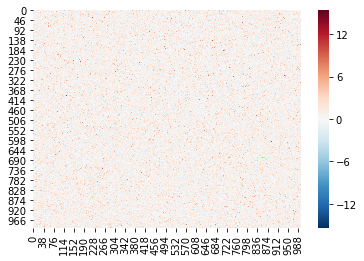

In [13]:
n=1000000
data_distro = scipy.stats.gumbel_r
test_data = data_distro().rvs(n)

test_matrix = test_data.reshape(1000,1000)
heatmap_centered_cmap(test_matrix)

In [15]:
%time ground_truth_means = scoring.compute_mean_table_2d(test_matrix, start_diagonal=1, end_diagonal=500)


CPU times: user 110 ms, sys: 8.94 ms, total: 119 ms
Wall time: 118 ms


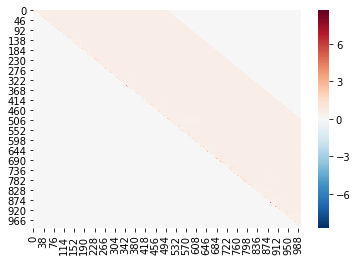

In [27]:
ground_truth_means = scoring.compute_mean_table_2d(test_matrix, start_diagonal=1, end_diagonal=500)
heatmap_centered_cmap(ground_truth_means)

# Score by region mean

In [ ]:
%%time
shuffled_means_ground_truth = peas.scoring.generate_permuted_matrix_scores(test_matrix, 
                                                                  num_shuffles=10000,
                                                                  min_region_size=2,
                                                                  max_region_size=500,
                                                                  start_diagonal=1,
                                                                  matrix_score_func=scoring.compute_mean_table_2d,
                                                                  random_seed=1,
                                                                 )

2018-Aug-28 18:59:30			Setting random seed to 1
2018-Aug-28 18:59:30				permutation 1 of 10000
2018-Aug-28 18:59:35				permutation 55 of 10000
2018-Aug-28 18:59:40				permutation 110 of 10000
2018-Aug-28 18:59:45				permutation 163 of 10000
2018-Aug-28 18:59:50				permutation 216 of 10000
2018-Aug-28 18:59:55				permutation 269 of 10000
2018-Aug-28 19:00:01				permutation 323 of 10000
2018-Aug-28 19:00:06				permutation 377 of 10000
2018-Aug-28 19:00:11				permutation 431 of 10000
2018-Aug-28 19:00:16				permutation 484 of 10000
2018-Aug-28 19:00:21				permutation 539 of 10000
2018-Aug-28 19:00:26				permutation 594 of 10000
2018-Aug-28 19:00:31				permutation 649 of 10000
2018-Aug-28 19:00:36				permutation 704 of 10000
2018-Aug-28 19:00:41				permutation 758 of 10000
2018-Aug-28 19:00:46				permutation 814 of 10000
2018-Aug-28 19:00:51				permutation 868 of 10000
2018-Aug-28 19:00:56				permutation 923 of 10000


In [ ]:
%time shuffled_means_ground_truth = {size:numpy.sort(data) for size, data in shuffled_means_ground_truth.items()}

In [41]:
%%time
shuffled_means_test = peas.scoring.generate_permuted_matrix_scores(test_matrix, 
                                                                  num_shuffles=100,
                                                                  min_region_size=2,
                                                                  max_region_size=500,
                                                                  start_diagonal=1,
                                                                  matrix_score_func=scoring.compute_mean_table_2d,
                                                                  random_seed=2,
                                                                 )

2018-Aug-28 16:33:48			Setting random seed to 1
2018-Aug-28 16:33:48				permutation 1 of 100
2018-Aug-28 16:33:53				permutation 62 of 100
CPU times: user 8.19 s, sys: 107 ms, total: 8.3 s
Wall time: 8.3 s


In [46]:
%time shuffled_means_test = {size:numpy.sort(data) for size, data in shuffled_means_test.items()}

In [33]:
reload(peas.scoring)
reload(peas.fitapproxdistros.helper_funcs)
reload(peas.fitapproxdistros)

<module 'peas.fitapproxdistros.helper_funcs' from '/gpfs/data01/glasslab/home/dskola/workspace/PEAS/peas/fitapproxdistros/helper_funcs.py'>

## Linear piecewise distribution

In [53]:
%%time
shuffled_distros_linear_params = peas.fitapproxdistros.helper_funcs.fit_distros(shuffled_means_test, 
                                                       distribution_class=peas.fitapproxdistros.distributions.PiecewiseApproxLinear,
                                                       parameter_smoothing_window_size=None,
                                                                               fit_kwargs={'is_sorted':True})

2018-Aug-28 16:46:37			size: 2 fit parameters: [-0.38030984 -0.91510803]
2018-Aug-28 16:46:37			size: 3 fit parameters: [ 0.20707537 -1.82534971]
2018-Aug-28 16:46:37			size: 4 fit parameters: [ 0.36617034 -2.77793789]
2018-Aug-28 16:46:37			size: 5 fit parameters: [ 0.43625854 -3.7455472 ]
2018-Aug-28 16:46:37			size: 6 fit parameters: [ 0.46950604 -4.69189279]
2018-Aug-28 16:46:37			size: 7 fit parameters: [ 0.4954967  -5.67170985]
2018-Aug-28 16:46:37			size: 8 fit parameters: [ 0.50870734 -6.60572712]
2018-Aug-28 16:46:37			size: 9 fit parameters: [ 0.51797366 -7.53181506]
2018-Aug-28 16:46:37			size: 10 fit parameters: [ 0.52623422 -8.50222285]
2018-Aug-28 16:46:37			size: 11 fit parameters: [ 0.53586181 -9.54777444]
2018-Aug-28 16:46:37			size: 12 fit parameters: [  0.54024382 -10.51954797]
2018-Aug-28 16:46:37			size: 13 fit parameters: [  0.54359024 -11.44425386]
2018-Aug-28 16:46:37			size: 14 fit parameters: [  0.54627823 -12.3581374 ]
2018-Aug-28 16:46:37			size: 15 fit para

2018-Aug-28 16:46:39			size: 115 fit parameters: [   0.5750519  -115.87297445]
2018-Aug-28 16:46:39			size: 116 fit parameters: [   0.57509718 -117.13416605]
2018-Aug-28 16:46:39			size: 117 fit parameters: [   0.57511358 -118.16854876]
2018-Aug-28 16:46:39			size: 118 fit parameters: [   0.57519072 -119.75932164]
2018-Aug-28 16:46:39			size: 119 fit parameters: [   0.57520869 -120.8121397 ]
2018-Aug-28 16:46:39			size: 120 fit parameters: [   0.57524453 -122.02620021]
2018-Aug-28 16:46:39			size: 121 fit parameters: [   0.57527349 -123.20048217]
2018-Aug-28 16:46:39			size: 122 fit parameters: [   0.57526314 -123.94647532]
2018-Aug-28 16:46:39			size: 123 fit parameters: [   0.57529776 -125.14726787]
2018-Aug-28 16:46:39			size: 124 fit parameters: [   0.5753266  -126.27001318]
2018-Aug-28 16:46:39			size: 125 fit parameters: [   0.57535624 -127.44508803]
2018-Aug-28 16:46:39			size: 126 fit parameters: [   0.57532917 -128.0332208 ]
2018-Aug-28 16:46:40			size: 127 fit parameters: [  

2018-Aug-28 16:46:41			size: 229 fit parameters: [   0.57625597 -239.37154058]
2018-Aug-28 16:46:41			size: 230 fit parameters: [   0.57625376 -240.31348113]
2018-Aug-28 16:46:41			size: 231 fit parameters: [   0.5762643  -241.71625134]
2018-Aug-28 16:46:41			size: 232 fit parameters: [   0.57626301 -242.60631765]
2018-Aug-28 16:46:41			size: 233 fit parameters: [   0.57625498 -243.30075651]
2018-Aug-28 16:46:41			size: 234 fit parameters: [   0.57626457 -244.65694992]
2018-Aug-28 16:46:41			size: 235 fit parameters: [   0.57625459 -245.29319902]
2018-Aug-28 16:46:41			size: 236 fit parameters: [   0.57624201 -245.76297074]
2018-Aug-28 16:46:41			size: 237 fit parameters: [   0.57623501 -246.43428106]
2018-Aug-28 16:46:42			size: 238 fit parameters: [   0.5762455  -247.84732799]
2018-Aug-28 16:46:42			size: 239 fit parameters: [   0.57622748 -248.13912807]
2018-Aug-28 16:46:42			size: 240 fit parameters: [   0.57624109 -249.76067597]
2018-Aug-28 16:46:42			size: 241 fit parameters: [  

2018-Aug-28 16:46:43			size: 334 fit parameters: [   0.57639851 -359.7043698 ]
2018-Aug-28 16:46:43			size: 335 fit parameters: [   0.57640111 -361.03614002]
2018-Aug-28 16:46:43			size: 336 fit parameters: [   0.57640064 -362.13088064]
2018-Aug-28 16:46:43			size: 337 fit parameters: [   0.57639561 -362.86934833]
2018-Aug-28 16:46:43			size: 338 fit parameters: [   0.57639829 -364.22759072]
2018-Aug-28 16:46:43			size: 339 fit parameters: [   0.57639053 -364.71304404]
2018-Aug-28 16:46:43			size: 340 fit parameters: [   0.57639112 -365.96067682]
2018-Aug-28 16:46:43			size: 341 fit parameters: [   0.57638179 -366.33950819]
2018-Aug-28 16:46:43			size: 342 fit parameters: [   0.57638485 -367.76234279]
2018-Aug-28 16:46:43			size: 343 fit parameters: [   0.57640158 -370.48089948]
2018-Aug-28 16:46:43			size: 344 fit parameters: [   0.5764013  -371.60099432]
2018-Aug-28 16:46:43			size: 345 fit parameters: [   0.57640881 -373.35472033]
2018-Aug-28 16:46:43			size: 346 fit parameters: [  

2018-Aug-28 16:46:45			size: 438 fit parameters: [   0.57640223 -475.84801024]
2018-Aug-28 16:46:45			size: 439 fit parameters: [   0.57640437 -477.08354981]
2018-Aug-28 16:46:45			size: 440 fit parameters: [   0.57639964 -477.49241613]
2018-Aug-28 16:46:45			size: 441 fit parameters: [   0.5763963  -477.90429897]
2018-Aug-28 16:46:45			size: 442 fit parameters: [   0.57639415 -478.55265831]
2018-Aug-28 16:46:45			size: 443 fit parameters: [   0.57639034 -478.94121333]
2018-Aug-28 16:46:45			size: 444 fit parameters: [   0.57639337 -480.54382785]
2018-Aug-28 16:46:45			size: 445 fit parameters: [   0.57638895 -480.80783614]
2018-Aug-28 16:46:45			size: 446 fit parameters: [   0.57638924 -481.88119456]
2018-Aug-28 16:46:45			size: 447 fit parameters: [   0.57639095 -483.23459691]
2018-Aug-28 16:46:45			size: 448 fit parameters: [   0.57639078 -484.08846339]
2018-Aug-28 16:46:45			size: 449 fit parameters: [   0.57638937 -485.01860578]
2018-Aug-28 16:46:45			size: 450 fit parameters: [  

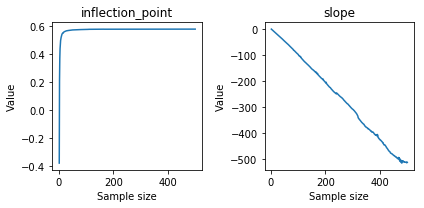

In [109]:
fig = plot_fit_params(shuffled_distros_linear_params, ['inflection_point', 'slope'])

In [164]:
predicted_mean_distros_linear = {size:peas.fitapproxdistros.distributions.PiecewiseApproxLinear(*params) for size, params in shuffled_distros_linear_params.items()}

## LinearDirect

In [142]:
%%time
shuffled_distros_lineardirect_params = peas.fitapproxdistros.helper_funcs.fit_distros(shuffled_means_test, 
                                                       distribution_class=peas.fitapproxdistros.distributions.PiecewiseApproxLinearDirect,
                                                       parameter_smoothing_window_size=None,
                                                                               fit_kwargs={'is_sorted':True})

Max examined data point: 5.541055912457006
2018-Aug-28 17:15:31			size: 2 fit parameters: (0.5760475817148205, -1.1123795147552349)
Max examined data point: 3.0872314107412158
2018-Aug-28 17:15:31			size: 3 fit parameters: (0.5777789771393561, -2.200468911647706)
Max examined data point: 2.2388237742090857
2018-Aug-28 17:15:31			size: 4 fit parameters: (0.5779837303093768, -3.3242030678262138)
Max examined data point: 1.815237485551041
2018-Aug-28 17:15:31			size: 5 fit parameters: (0.5774291564355556, -4.459467541907341)
Max examined data point: 1.5619864360198787
2018-Aug-28 17:15:31			size: 6 fit parameters: (0.5775077682612872, -5.605973737371934)
Max examined data point: 1.3944324423566639
2018-Aug-28 17:15:31			size: 7 fit parameters: (0.5773539451863697, -6.753275303628908)
Max examined data point: 1.274535711522996
2018-Aug-28 17:15:31			size: 8 fit parameters: (0.5773203253381382, -7.912833842888541)
Max examined data point: 1.190297968037869
2018-Aug-28 17:15:31			size: 9 fit

Max examined data point: 0.5904904154873564
2018-Aug-28 17:15:31			size: 307 fit parameters: (0.5772322408889855, -389.09542942336964)
Max examined data point: 0.5904044887700229
2018-Aug-28 17:15:31			size: 308 fit parameters: (0.5772295197244306, -391.44328767313476)
Max examined data point: 0.5903473813719627
2018-Aug-28 17:15:31			size: 309 fit parameters: (0.5772266256648797, -392.9506265172859)
Max examined data point: 0.5902963189553753
2018-Aug-28 17:15:31			size: 310 fit parameters: (0.5772235529016925, -394.2825139970397)
Max examined data point: 0.5902557126136705
2018-Aug-28 17:15:31			size: 311 fit parameters: (0.5772205319346916, -395.30828043280974)
Max examined data point: 0.5902447833853934
2018-Aug-28 17:15:31			size: 312 fit parameters: (0.5772171693281739, -395.42655555871863)
Max examined data point: 0.5901857793014307
2018-Aug-28 17:15:31			size: 313 fit parameters: (0.5772138960870196, -397.0134526102004)
Max examined data point: 0.5901348178646245
2018-Aug-28 17

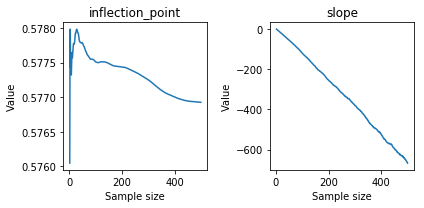

In [143]:
fig = plot_fit_params(shuffled_distros_lineardirect_params, ['inflection_point', 'slope'])

In [144]:
predicted_mean_distros_lineardirect = {size:peas.fitapproxdistros.distributions.PiecewiseApproxLinearDirect(*params) for size, params in shuffled_distros_lineardirect_params.items()}

## Piecewise power tail

In [124]:
%%time
shuffled_distros_power_params = peas.fitapproxdistros.helper_funcs.fit_distros(shuffled_means_test, 
                                                       distribution_class=peas.fitapproxdistros.distributions.PiecewiseApproxPower,
                                                       parameter_smoothing_window_size=None)

2018-Aug-28 17:09:42			size: 2 fit parameters: (-0.8351818834459566, 1.2388800135632756, -0.5564345377695165)
2018-Aug-28 17:09:42			size: 3 fit parameters: (-0.4380375900354739, 1.5578096818377016, -0.7756625106723746)
2018-Aug-28 17:09:42			size: 4 fit parameters: (-0.233915768470771, 1.7835450136508755, -1.0984088544095145)
2018-Aug-28 17:09:42			size: 5 fit parameters: (-0.09377676659458374, 1.9219734433373825, -1.5930471838788136)
2018-Aug-28 17:09:42			size: 6 fit parameters: (0.002764713598990943, 2.0263492949388873, -2.243668182491642)
2018-Aug-28 17:09:42			size: 7 fit parameters: (0.06990405997006459, 2.1122401137510547, -3.0475828951564354)
2018-Aug-28 17:09:42			size: 8 fit parameters: (0.11579951789000668, 2.2035122004465415, -3.9875691061956227)
2018-Aug-28 17:09:42			size: 9 fit parameters: (0.1696673202845038, 2.2186648299105878, -5.271609414130276)
2018-Aug-28 17:09:42			size: 10 fit parameters: (0.19445847812017264, 2.3133373011572744, -6.58994155791522)
2018-Aug-28 1

2018-Aug-28 17:09:44			size: 80 fit parameters: (0.5225654041429891, 2.8202904740560486, -2478.4791880598355)
2018-Aug-28 17:09:44			size: 81 fit parameters: (0.5226375267612378, 2.844857807157821, -2680.9552717386287)
2018-Aug-28 17:09:44			size: 82 fit parameters: (0.5242129833688214, 2.813005044391558, -2640.466407860265)
2018-Aug-28 17:09:44			size: 83 fit parameters: (0.5255040538560315, 2.792981645925062, -2651.100566481603)
2018-Aug-28 17:09:45			size: 84 fit parameters: (0.5250589270551289, 2.84015886823755, -2984.5616037820887)
2018-Aug-28 17:09:45			size: 85 fit parameters: (0.5248925447972248, 2.878309510351491, -3315.4646085505456)
2018-Aug-28 17:09:45			size: 86 fit parameters: (0.5250903250492559, 2.8998671072234252, -3567.138033945143)
2018-Aug-28 17:09:45			size: 87 fit parameters: (0.5256690748882191, 2.9033509890630986, -3725.03016182035)
2018-Aug-28 17:09:45			size: 88 fit parameters: (0.5261823237625235, 2.9114738845565027, -3926.0801507568085)
2018-Aug-28 17:09:45	

2018-Aug-28 17:09:47			size: 157 fit parameters: (0.5222303722422178, 5.071223850716397, -1696904.3707547314)
2018-Aug-28 17:09:47			size: 158 fit parameters: (0.5216050382387304, 5.152261104460685, -2028943.950473031)
2018-Aug-28 17:09:47			size: 159 fit parameters: (0.5212347570900567, 5.205698523892281, -2304365.0453150403)
2018-Aug-28 17:09:47			size: 160 fit parameters: (0.5214328824885459, 5.219497479613824, -2434927.5600412395)
2018-Aug-28 17:09:47			size: 161 fit parameters: (0.5212241569515151, 5.263308699022559, -2722273.8835559725)
2018-Aug-28 17:09:47			size: 162 fit parameters: (0.5236908539368316, 5.096970462006241, -2108572.4179837247)
2018-Aug-28 17:09:47			size: 163 fit parameters: (0.5255284782079865, 4.975070193516593, -1753280.4256471891)
2018-Aug-28 17:09:47			size: 164 fit parameters: (0.5272766288561116, 4.858810769436705, -1466107.0838183751)
2018-Aug-28 17:09:47			size: 165 fit parameters: (0.5291340510280111, 4.733317934686267, -1195788.903444961)
2018-Aug-28 

2018-Aug-28 17:09:49			size: 237 fit parameters: (0.5524411564073445, 3.809265781286261, -882254.623681782)
2018-Aug-28 17:09:49			size: 238 fit parameters: (0.5524187928383695, 3.825093036245195, -930536.3698011963)
2018-Aug-28 17:09:49			size: 239 fit parameters: (0.5522549559571037, 3.857997698522812, -1032516.5615923274)
2018-Aug-28 17:09:49			size: 240 fit parameters: (0.5527519600252857, 3.810166811546002, -929715.4672099131)
2018-Aug-28 17:09:49			size: 241 fit parameters: (0.5530489037720551, 3.785063009800986, -896863.1445183451)
2018-Aug-28 17:09:49			size: 242 fit parameters: (0.55310298561781, 3.790064221422949, -924044.7163348031)
2018-Aug-28 17:09:49			size: 243 fit parameters: (0.5531562004997558, 3.7969716787072656, -955547.1262833974)
2018-Aug-28 17:09:49			size: 244 fit parameters: (0.5534211027926051, 3.776955482453488, -927552.4059423007)
2018-Aug-28 17:09:49			size: 245 fit parameters: (0.5537203147631167, 3.752724949331526, -887015.8026442042)
2018-Aug-28 17:09:49

2018-Aug-28 17:09:51			size: 314 fit parameters: (0.5615607920294039, 3.362464425230857, -800620.4982665717)
2018-Aug-28 17:09:51			size: 315 fit parameters: (0.5612304823683171, 3.4291606992309345, -983369.8286589413)
2018-Aug-28 17:09:51			size: 316 fit parameters: (0.5610520493611233, 3.4721173487344914, -1124029.9587185348)
2018-Aug-28 17:09:51			size: 317 fit parameters: (0.5609699831279847, 3.4975693251666495, -1220685.0456689934)
2018-Aug-28 17:09:51			size: 318 fit parameters: (0.5606543926824914, 3.565501729083957, -1506367.016476761)
2018-Aug-28 17:09:51			size: 319 fit parameters: (0.5607377978600612, 3.5644555105744162, -1520177.205279054)
2018-Aug-28 17:09:51			size: 320 fit parameters: (0.5607214850711648, 3.578390327333534, -1600179.4787991992)
2018-Aug-28 17:09:51			size: 321 fit parameters: (0.5603609919548335, 3.6527103309387825, -2014284.145819233)
2018-Aug-28 17:09:51			size: 322 fit parameters: (0.5605798041214639, 3.629245606709526, -1902533.7759772257)
2018-Aug-2

2018-Aug-28 17:09:53			size: 395 fit parameters: (0.5586485558017088, 4.700492351994735, -98135028.82602176)
2018-Aug-28 17:09:53			size: 396 fit parameters: (0.5587522640516656, 4.692273596262393, -96875339.19512185)
2018-Aug-28 17:09:53			size: 397 fit parameters: (0.558131618678328, 4.838538783374534, -148710506.95405155)
2018-Aug-28 17:09:53			size: 398 fit parameters: (0.5582517293678079, 4.826150208174798, -146372639.70246455)
2018-Aug-28 17:09:53			size: 399 fit parameters: (0.5578038705128407, 4.93603060565414, -201297899.23604894)
2018-Aug-28 17:09:53			size: 400 fit parameters: (0.5580737722299198, 4.8911587557264316, -180861723.37132305)
2018-Aug-28 17:09:54			size: 401 fit parameters: (0.5578578086078796, 4.950019076205683, -217204423.47912475)
2018-Aug-28 17:09:54			size: 402 fit parameters: (0.5579639377416716, 4.941733795340857, -215202197.0099952)
2018-Aug-28 17:09:54			size: 403 fit parameters: (0.5579025225949588, 4.965509118379971, -233610481.18304685)
2018-Aug-28 17

2018-Aug-28 17:09:55			size: 475 fit parameters: (0.5616920374868067, 4.828523881138399, -395848208.20146424)
2018-Aug-28 17:09:56			size: 476 fit parameters: (0.561747771227316, 4.820872561059968, -390666104.0673514)
2018-Aug-28 17:09:56			size: 477 fit parameters: (0.5618628054487086, 4.797195283403493, -365989993.8457387)
2018-Aug-28 17:09:56			size: 478 fit parameters: (0.5617579444612661, 4.830708139832388, -408075755.8854464)
2018-Aug-28 17:09:56			size: 479 fit parameters: (0.5620290460965797, 4.765188750344473, -335891577.2362128)
2018-Aug-28 17:09:56			size: 480 fit parameters: (0.5622208272042779, 4.7207744821568145, -295868134.0401235)
2018-Aug-28 17:09:56			size: 481 fit parameters: (0.5623488287379723, 4.69161209640235, -272982698.7357039)
2018-Aug-28 17:09:56			size: 482 fit parameters: (0.5624551784873572, 4.666568110159116, -256079716.12245932)
2018-Aug-28 17:09:56			size: 483 fit parameters: (0.5624037579054039, 4.684857178648175, -273053620.8450913)
2018-Aug-28 17:09:

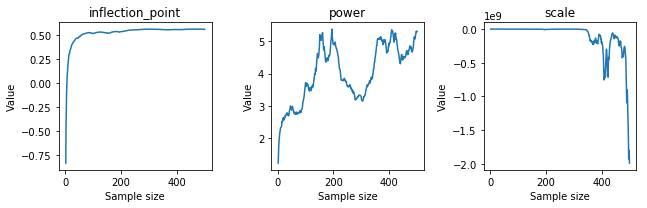

In [125]:
fig = plot_fit_params(shuffled_distros_power_params, ['inflection_point', 'power', 'scale'])

In [134]:
predicted_mean_distros_power = {size:peas.fitapproxdistros.distributions.PiecewiseApproxPower(*params) for size, params in shuffled_distros_power_params.items()}

## Analytical normal

In [126]:
%%time
shuffled_distros_norm_params = peas.fitapproxdistros.helper_funcs.fit_distros(shuffled_means_test, 
                                                       distribution_class=scipy.stats.norm,
                                                       parameter_smoothing_window_size=None)

2018-Aug-28 17:10:49			size: 2 fit parameters: (0.5760475817148205, 1.2791441534228172)
2018-Aug-28 17:10:49			size: 3 fit parameters: (0.5777789771393561, 0.742426353187062)
2018-Aug-28 17:10:49			size: 4 fit parameters: (0.5779837303093768, 0.5252351554576864)
2018-Aug-28 17:10:49			size: 5 fit parameters: (0.5774291564355556, 0.4064082644584888)
2018-Aug-28 17:10:49			size: 6 fit parameters: (0.5775077682612872, 0.33153579612122414)
2018-Aug-28 17:10:49			size: 7 fit parameters: (0.5773539451863697, 0.2801840052928401)
2018-Aug-28 17:10:49			size: 8 fit parameters: (0.5773203253381382, 0.24288211254932962)
2018-Aug-28 17:10:49			size: 9 fit parameters: (0.5774974034641086, 0.21435076407532214)
2018-Aug-28 17:10:49			size: 10 fit parameters: (0.5776093933036206, 0.19180550417341677)
2018-Aug-28 17:10:49			size: 11 fit parameters: (0.5776488603139291, 0.173517433209932)
2018-Aug-28 17:10:49			size: 12 fit parameters: (0.5775700519084336, 0.15854245194807914)
2018-Aug-28 17:10:49			siz

2018-Aug-28 17:10:50			size: 408 fit parameters: (0.5769903157583337, 0.004192995578217704)
2018-Aug-28 17:10:50			size: 409 fit parameters: (0.5769887327627018, 0.0041819018905648155)
2018-Aug-28 17:10:50			size: 410 fit parameters: (0.5769871263839896, 0.00417100681462737)
2018-Aug-28 17:10:50			size: 411 fit parameters: (0.5769856621017657, 0.004160390619500053)
2018-Aug-28 17:10:50			size: 412 fit parameters: (0.5769841968385709, 0.004149804642156283)
2018-Aug-28 17:10:50			size: 413 fit parameters: (0.5769826803536227, 0.004139381319984034)
2018-Aug-28 17:10:50			size: 414 fit parameters: (0.5769813372571393, 0.004128927648353502)
2018-Aug-28 17:10:50			size: 415 fit parameters: (0.5769801154923455, 0.0041187710402161935)
2018-Aug-28 17:10:50			size: 416 fit parameters: (0.5769789870371284, 0.004108785917239047)
2018-Aug-28 17:10:50			size: 417 fit parameters: (0.5769777138798982, 0.004098724300632932)
2018-Aug-28 17:10:50			size: 418 fit parameters: (0.5769765275688827, 0.0040886

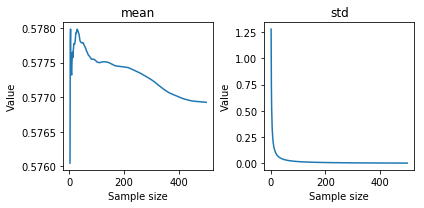

In [127]:
fig = plot_fit_params(shuffled_distros_norm_params, ['mean', 'std'])

In [135]:
predicted_mean_distros_norm = {size:scipy.stats.norm(*params) for size, params in shuffled_distros_norm_params.items()}

## Evaluate

In [192]:
def rms(X, Y):
    return numpy.sqrt(numpy.mean((X - Y)**2))


def determine_max_test_value(empirical_sample):
    return empdist.empirical_pval.compute_empirical_quantile(data=empirical_sample, 
                                                             q=1-empdist.empirical_pval.compute_p_confidence(len(empirical_sample)), 
                                                             is_sorted=True)
    
    
def evaluate_fits(size, ground_truth_shuffled_data, distros_by_size, test_vector):

    ground_truth_empirical_pvalues = empdist.empirical_pval.compute_empirical_pvalue(ground_truth_shuffled_data[size],
                                                                             test_vector, tail='right', 
                                                                              is_sorted=True)
    ground_truth_empirical_pscores = -10 * numpy.log(ground_truth_empirical_pvalues)
    test_pscores = -10 * distros_by_size[size].logsf(test_vector)
    
    return test_vector, ground_truth_empirical_pscores, test_pscores

In [ ]:
size = 495
min_size = min(numpy.diag(ground_truth_means, size-1))
max_size = determine_max_test_value(shuffled_means_ground_truth[size])
print('Maximum tested value: {}'.format(max_size))
test_vector = numpy.linspace(min_size, max_size, num=100)

In [ ]:
test_xs, true_ys, predicted_ys = evaluate_fits(size, shuffled_means_ground_truth, predicted_mean_distros_linear, test_vector)

plt.plot(test_xs, true_ys)
plt.plot(test_xs, predicted_ys)
print('RMS: {}'.format(rms(true_ys, predicted_ys)))

In [ ]:
test_xs, true_ys, predicted_ys = evaluate_fits(size, shuffled_means_ground_truth, predicted_mean_distros_lineardirect, test_vector)

plt.plot(test_xs, true_ys)
plt.plot(test_xs, predicted_ys)
print('RMS: {}'.format(rms(true_ys, predicted_ys)))

In [ ]:
test_xs, true_ys, predicted_ys = evaluate_fits(size, shuffled_means_ground_truth, predicted_mean_distros_power, test_vector)

plt.plot(test_xs, true_ys)
plt.plot(test_xs, predicted_ys)
print('RMS: {}'.format(rms(true_ys, predicted_ys)))

In [ ]:
test_xs, true_ys, predicted_ys = evaluate_fits(size, shuffled_means_ground_truth, predicted_mean_distros_norm, test_vector)

plt.plot(test_xs, true_ys)
plt.plot(test_xs, predicted_ys)
print('RMS: {}'.format(rms(true_ys, predicted_ys)))

## Test fits systematically across distribution types

In [ ]:
from peas.utilities import log_print

In [ ]:
distro_collections = {'analytical_norm':predicted_mean_distros_norm, 
                      'pw_linear': predicted_mean_distros_linear,
                      'pw_lineardirect':predicted_mean_distros_lineardirect,
                      'pw_power':predicted_mean_distros_power}
all_distro_rms = {}
for distro_name, distro_set in distro_collections.items():
    all_distro_rms[distro_name] = {}
    for size in sorted(distro_set.keys()):
        
        min_size = min(numpy.diag(test_matrix, size-1))
        max_size = determine_max_test_value(shuffled_means_ground_truth[size])
        print('Maximum tested value: {}'.format(max_size))
        test_vector = numpy.linspace(min_size, max_size, num=100)
        
        
        test_xs, true_ys, predicted_ys = evaluate_fits(size, shuffled_means_ground_truth, 
                                                       distro_set, 
                                                       test_vector=test_vector)
        
        this_rms = rms(true_ys, predicted_ys)
        all_distro_rms[distro_name][size] = this_rms
        log_print((distro_name, size, this_rms))

In [ ]:
pandas.DataFrame(all_distro_rms)

## Show where empirical sampling tops out